# 🧠 Домашнее задание по рекомендательной системе аниме

## 📋 Задание

В этом задании вы будете работать с датасетом, содержащим информацию об аниме. Цель — создать простую рекомендательную систему, которая по названию одного аниме предлагает топ-20 наиболее похожих. Мы будем использовать модель `Doc2Vec` для представления описаний аниме в векторном пространстве и поиска наиболее близких по смыслу.

---

## 🔧 Этапы выполнения

### 1. Загрузка и предварительный анализ данных
- Загрузите файл `anime.csv`.
- Выведите размер датафрейма (количество строк и колонок).
- Выведите первые 5 строк датасета.

### 2. Подготовка данных
- Объедините все **строковые колонки** в одну колонку `description`.
  - Пример: склеиваем `Genres`, `English name`, `Japanese name`, `Type`, `Producers`, `Studios`, `Source`, `Rating` и другие текстовые поля.
- Преобразуйте значения в **нижний регистр** и **уберите пропуски** (если они есть).
- **Очистка текста:**
  - Удалите стоп-слова, такие как "the", "is", "and", и т.д.
  - Удалите знаки препинания и числа.
  - Используйте **лемматизацию** для приведения слов к их базовой форме (например, "running" → "run").

### 3. Обучение модели Doc2Vec
- Используйте библиотеку `gensim` и обучите модель `Doc2Vec` на колонке `description`.
  - Преобразуйте каждую строку описания аниме в вектор.
- Параметры модели:
  - **vector_size**: размерность вектора.
  - **epochs**: количество эпох для обучения.
  - **min_count**: минимальное количество вхождений слова для добавления в словарь.
  - **alpha** и **min_alpha**: параметры обучения, отвечающие за скорость обучения.

### 4. Функция рекомендаций
- Реализуйте функцию `recommend(anime_name: str, top_n: int = 20)`, которая:
  - Принимает название аниме.
  - Находит его описание и преобразует в вектор с помощью обученной модели.
  - Находит топ-N наиболее похожих аниме по **косинусному сходству**.
  - Возвращает **названия** рекомендованных аниме.

### 5. Пример использования функции
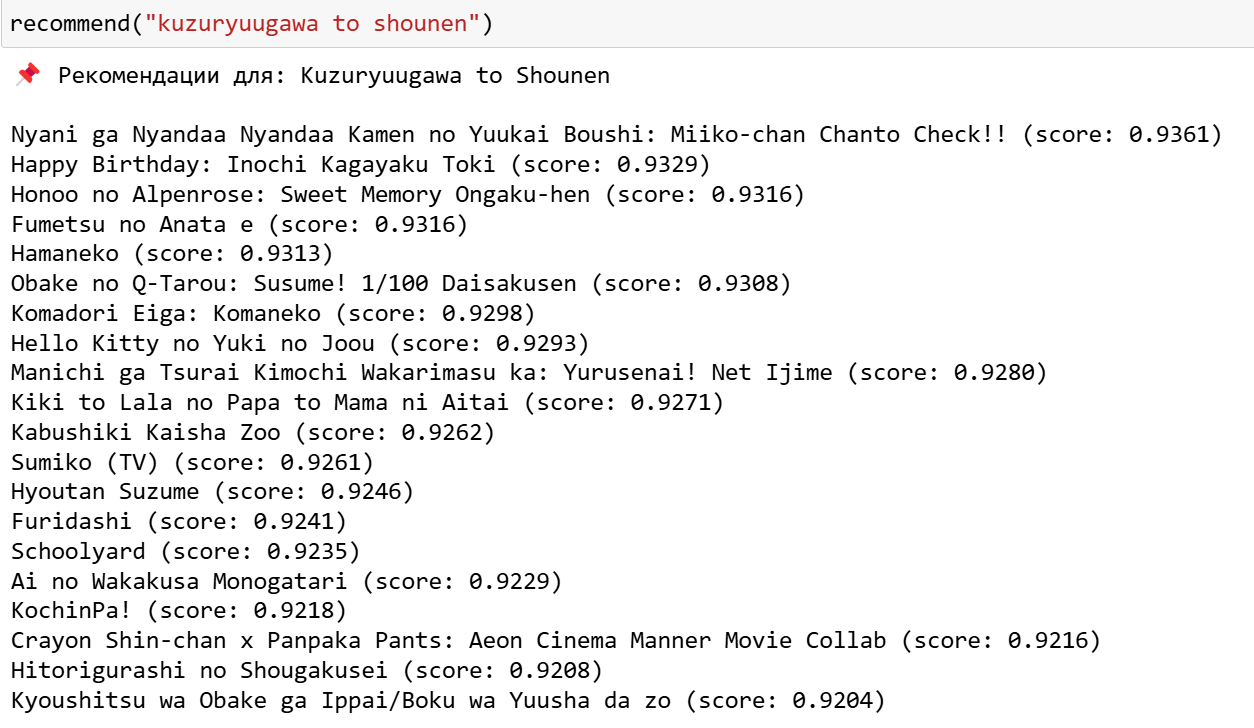

In [1]:
import pandas as pd
import numpy as np
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\trill\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\trill\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\trill\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
import pandas as pd
import numpy as np
import gensim
import nltk

print(f"pandas version: {pd.__version__}")
print(f"numpy version: {np.__version__}")
print(f"gensim version: {gensim.__version__}")
print(f"nltk version: {nltk.__version__}")

pandas version: 2.2.3
numpy version: 1.26.4
gensim version: 4.3.3
nltk version: 3.9.1
